In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [57]:
df = pd.read_csv('/content/HR_comma_sep(in).csv')

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [60]:
df.shape

(14999, 10)

In [61]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [62]:
df.columns = df.columns.str.strip().str.lower()

In [63]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [64]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
work_accident,int64
left,int64
promotion_last_5years,int64
department,object
salary,object


In [65]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [67]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [68]:
df.describe(exclude="number")

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [69]:
df['left'].value_counts()

,count
left,
0,11428
1,3571


In [70]:
df.duplicated(keep="first").sum()

np.int64(3008)

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.shape

(11991, 10)

In [73]:
df['left'].value_counts()

,count
left,
0,10000
1,1991


In [74]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

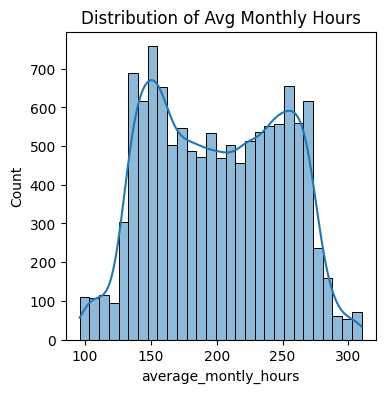

In [75]:
plt.figure(figsize=(4, 4))
sns.histplot(df["average_montly_hours"], kde=True)
plt.title("Distribution of Avg Monthly Hours")
plt.show()

In [76]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3])

In [77]:
df["number_project"].value_counts()

,count
number_project,
4,3685
3,3520
5,2233
2,1582
6,826
7,145


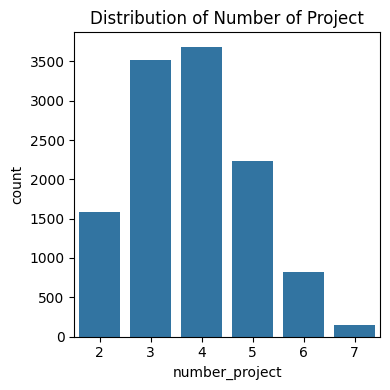

In [78]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="number_project")
plt.title("Distribution of Number of Project")
plt.tight_layout()
plt.show()

In [79]:
df["promotion_last_5years"].value_counts()

,count
promotion_last_5years,
0,11788
1,203


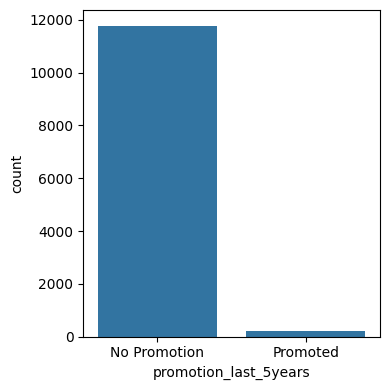

In [80]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='promotion_last_5years')
plt.xticks([0, 1], ['No Promotion', 'Promoted'])
plt.tight_layout()
plt.show()


In [81]:
df["work_accident"].value_counts()

,count
work_accident,
0,10141
1,1850


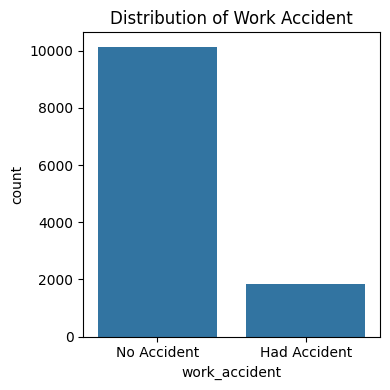

In [82]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='work_accident')
plt.title("Distribution of Work Accident")
plt.xticks([0, 1], ['No Accident', 'Had Accident'])
plt.tight_layout()
plt.show()

In [83]:
df["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [84]:
df["time_spend_company"].value_counts()

,count
time_spend_company,
3,5190
2,2910
4,2005
5,1062
6,542
10,107
7,94
8,81


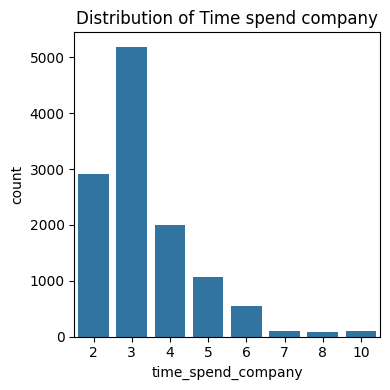

In [85]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='time_spend_company')
plt.title("Distribution of Time spend company")
plt.tight_layout()
plt.show()

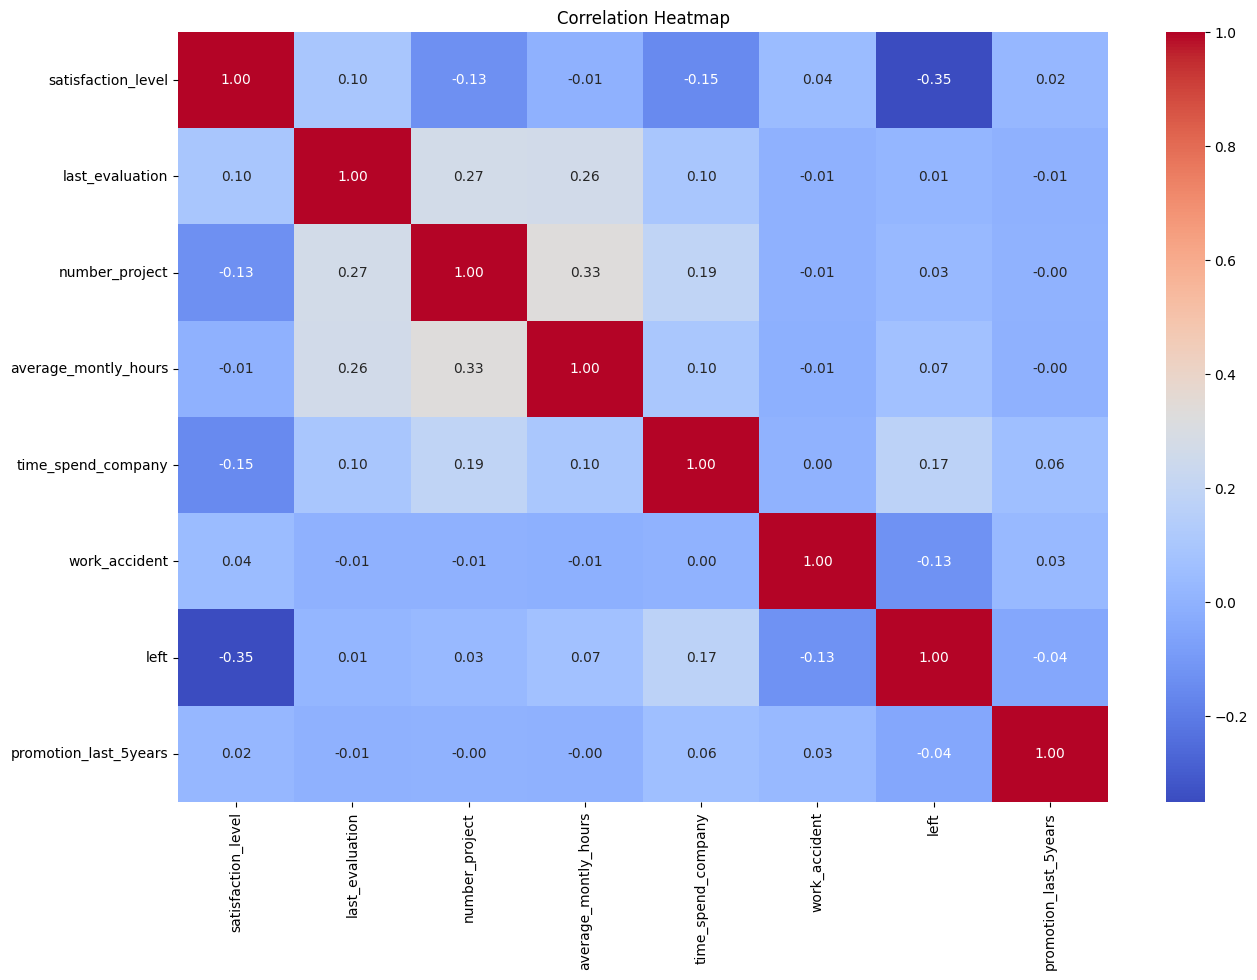

In [86]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [87]:
df["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [88]:
df["department"].value_counts()

,count
department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


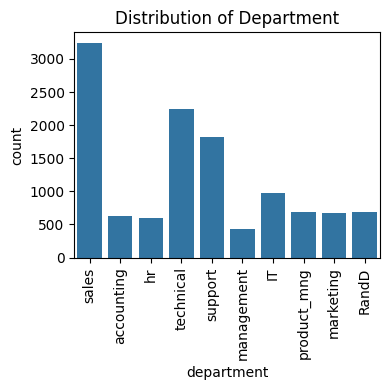

In [89]:
plt.figure(figsize=(4, 4))
sns.countplot(x = "department", data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Department")
plt.tight_layout()
plt.show()

In [90]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [91]:
df["salary"].value_counts()

,count
salary,
low,5740
medium,5261
high,990


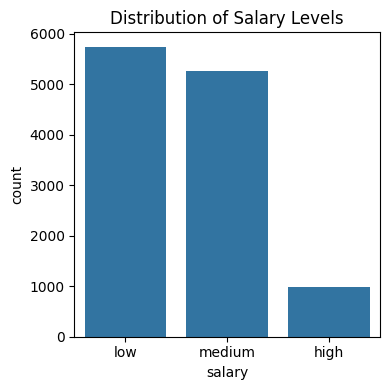

In [92]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='salary')
plt.title("Distribution of Salary Levels")
plt.tight_layout()
plt.show()


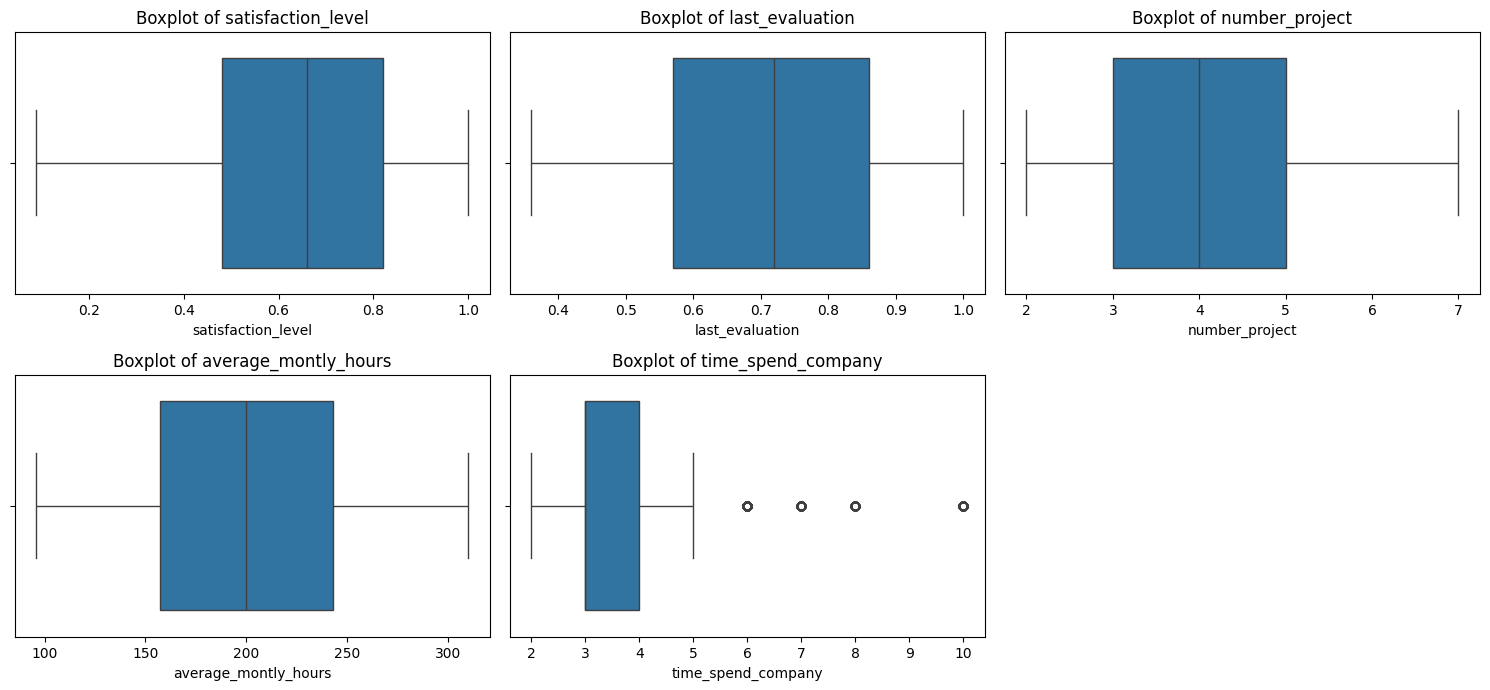

In [93]:
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [94]:
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [95]:
df['time_spend_company'].value_counts()

,count
time_spend_company,
3,5190
2,2910
4,2005
5,1062
6,542
10,107
7,94
8,81


In [96]:
salary_level = {'low': 0, 'medium': 1, 'high': 2}
df['salary'] = df['salary'].map(salary_level)

categorical_cols = ["department"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="dept", dtype=int)

In [97]:
encoded_cols

,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0
11996,0,0,0,0,1,0,0,0,0,0
11997,0,0,0,0,1,0,0,0,0,0
11998,0,0,0,0,0,1,0,0,0,0


In [98]:
df = df.join(encoded_cols)

In [99]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0


In [100]:
df.drop(categorical_cols, axis=1, inplace=True)

In [101]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [102]:
df['left'].value_counts()

,count
left,
0,10000
1,1991


In [103]:
X = df.drop("left", axis=1)
y = df["left"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
y_train.value_counts(normalize=True)

,proportion
left,
0,0.833924
1,0.166076


In [106]:
y_test.value_counts(normalize=True)

,proportion
left,
0,0.834098
1,0.165902


In [107]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [108]:
y_train_resampled.value_counts()

,count
left,
0,7999
1,7999
